<a href="https://colab.research.google.com/github/pakaji93/Data_Science_Project/blob/main/Data_Science_Project_4_Gandhung_Wicaksono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Data Understanding

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#EDA

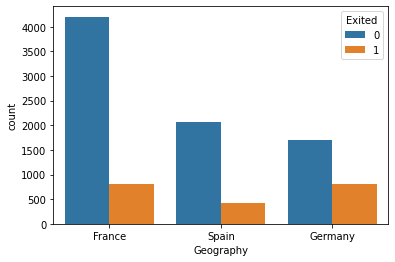

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=df)

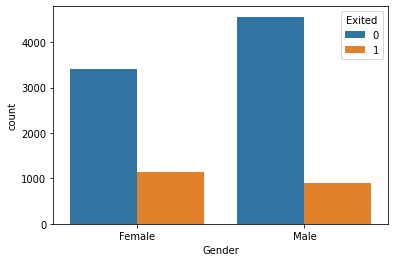

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=df)

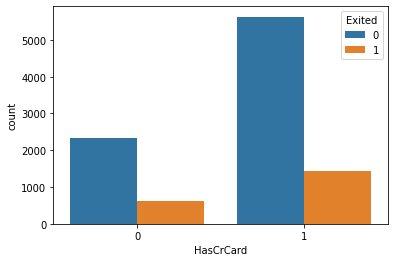

In [ ]:
sns.countplot(x='HasCrCard', hue='Exited', data=df)

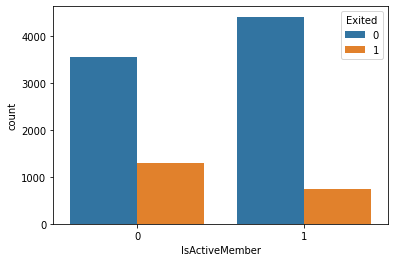

In [ ]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

Numerical Features

In [ ]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


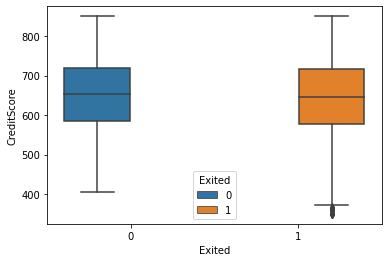

In [ ]:
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df)

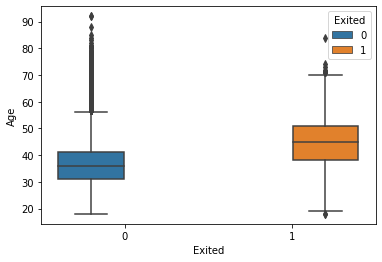

In [ ]:
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df)

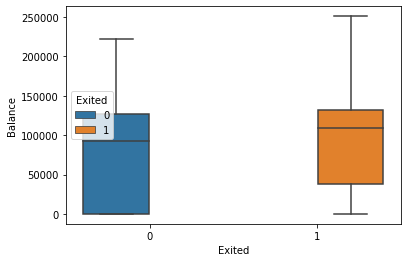

In [ ]:
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df)

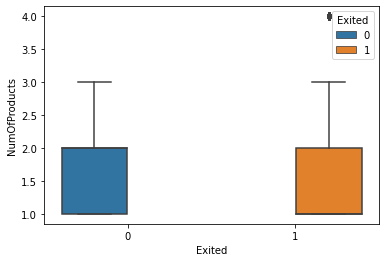

In [ ]:
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df)

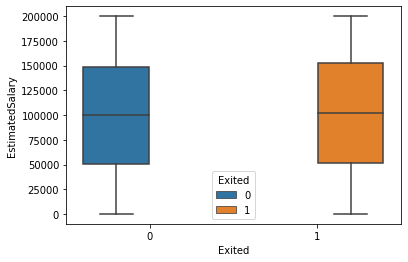

In [ ]:
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df)

#Correlation

In [ ]:
cm = df.corr()
cm

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


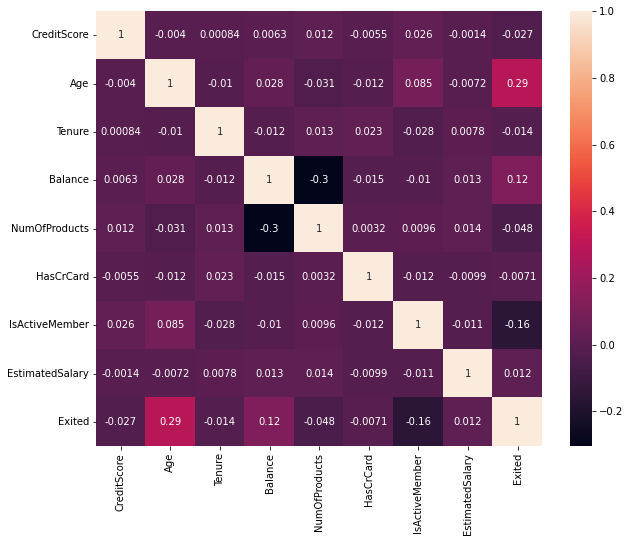

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)

#Target DIstribution

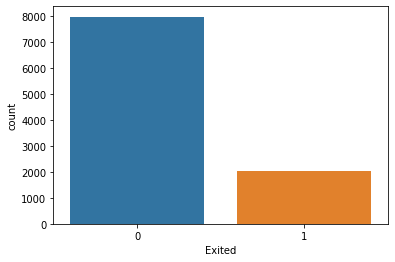

In [ ]:
sns.countplot(x='Exited', data=df)

In [ ]:
df['Exited'].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

Dari Grafik Target dapat dilihat bahwa data

#Feature Engineering

In [ ]:
df_fe = df.copy()

In [ ]:
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_fe['CreditScoreByAge'] = df_fe['CreditScore'] / df_fe['Age']
df_fe['TenureByAge'] = df_fe['Tenure'] / df_fe['Age']
df_fe['BalanceSalaryRatio'] = df_fe['Balance'] / df_fe['EstimatedSalary']

In [ ]:
df_fe.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreByAge,TenureByAge,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375


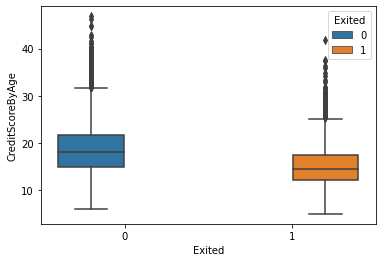

In [ ]:
sns.boxplot(y='CreditScoreByAge', x='Exited', hue='Exited', data=df_fe)

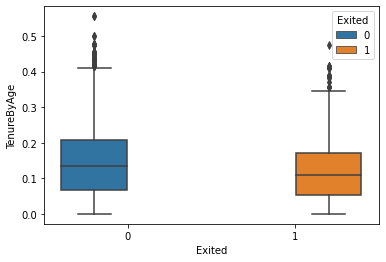

In [ ]:
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df_fe)

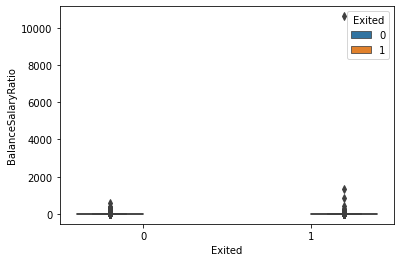

In [ ]:
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df_fe)

Dari ketiga feature baru yang dibuat, **CreditScorebyAge** menjadi menarik karena nilai Credit yang rendah berpotensi untuk churn

#Data Preparation

In [ ]:
df_prep = df_fe.copy()

In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_prep[string_feat])
df_ohe_res = pd.DataFrame(ohe.transform(df_prep[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df_prep = pd.concat([df_prep, df_ohe_res], axis=1)
df_prep = df_prep.drop(columns=string_feat)
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreByAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055,0.0,0.0,1.0,1.0,0.0


In [ ]:
#Normalisasi
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_prep)
df_prep = pd.DataFrame(mm.transform(df_prep),
                     columns=df_prep.columns)
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreByAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.235083,0.085714,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.237252,0.043902,0.000070,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.168807,0.342857,0.000132,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.310859,0.046154,0.000000,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.354739,0.083721,0.000150,0.0,0.0,1.0,1.0,0.0


#Modeling

##Data train

In [ ]:
from sklearn.model_selection import train_test_split

X = df_prep.drop(columns=['Exited']).copy()
y = df_prep['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7500, 16)
(2500, 16)


In [ ]:
#Logistic, SVM, Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Fit Model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

- Accuracy : Akurasi prediksi model
- Precision : Prediksi label positif dari model
- Recal : kualitas model dalam memprediksi data positif
- F1Score : harmonic mean dr Precision Recall
- ROC-AUC : seberap yakin model dalam prediksi

Note: kelas positif -> customer churn

Binary Classification (Kelas 1 atau Kelas 0)

Memprediksi probabilitas
Data A -> prob ke kelas 1 = 90%
Data B -> prob ke kelas 1 = 30%

Threshold
- Prob menjadi kelas 1 diatas 50%, label 1
- Prob menjadi kelas 1 dibawah 50%, label 0

Prediksi Label
- Data A -> kelas 1
- Data B -> kelas 0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
print('Logistics Regression')
y_pred_lr = log.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Precision:{:.2f}'.format(precision_score(y_test, y_pred_lr)))
print('Recall:{:.2f}'.format(recall_score(y_test, y_pred_lr)))
print('F1-Score:{:.2f}'.format(f1_score(y_test, y_pred_lr)))

y_pred_proba_lr = log.predict_proba(X_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_lr)))

Logistics Regression
Accuracy: 0.81
Precision:0.58
Recall:0.21
F1-Score:0.31
ROC AUC: 0.78


In [ ]:
print('SVC')
y_pred_svc = svc.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_svc)))
print('Precision:{:.2f}'.format(precision_score(y_test, y_pred_svc)))
print('Recall:{:.2f}'.format(recall_score(y_test, y_pred_svc)))
print('F1-Score:{:.2f}'.format(f1_score(y_test, y_pred_svc)))

y_pred_proba_svc = log.predict_proba(X_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_svc)))

SVC
Accuracy: 0.84
Precision:0.81
Recall:0.23
F1-Score:0.35
ROC AUC: 0.78


In [ ]:
print('Random Forest')
y_pred_rf = rf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision:{:.2f}'.format(precision_score(y_test, y_pred_rf)))
print('Recall:{:.2f}'.format(recall_score(y_test, y_pred_rf)))
print('F1-Score:{:.2f}'.format(f1_score(y_test, y_pred_rf)))

y_pred_proba_rf = log.predict_proba(X_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_rf)))

Random Forest
Accuracy: 0.87
Precision:0.77
Recall:0.46
F1-Score:0.58
ROC AUC: 0.78


In [ ]:
data = np.array([['','Accuracy','Precision','Recall', 'F1-Score', 'ROC AUC'],
                 ['Logistic Reg',accuracy_score(y_test, y_pred_lr).round(2),precision_score(y_test, y_pred_lr).round(2),recall_score(y_test, y_pred_lr).round(2),f1_score(y_test, y_pred_lr).round(2),roc_auc_score(y_test, y_pred_proba_lr).round(2)],
                 ['SVC',accuracy_score(y_test, y_pred_svc).round(2),precision_score(y_test, y_pred_svc).round(2),recall_score(y_test, y_pred_svc).round(2),f1_score(y_test, y_pred_svc).round(2),roc_auc_score(y_test, y_pred_proba_svc).round(2)],
                 ['Random Forest',accuracy_score(y_test, y_pred_rf).round(2),precision_score(y_test, y_pred_rf).round(2),recall_score(y_test, y_pred_rf).round(2),f1_score(y_test, y_pred_rf).round(2),roc_auc_score(y_test, y_pred_proba_rf).round(2)]])

In [ ]:
data

array([['', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
       ['Logistic Reg', '0.81', '0.58', '0.21', '0.31', '0.78'],
       ['SVC', '0.84', '0.81', '0.23', '0.35', '0.78'],
       ['Random Forest', '0.87', '0.77', '0.46', '0.58', '0.78']],
      dtype='<U32')

In [ ]:
table = pd.DataFrame(data= data[1:,1:],
                     index = data[1:,0],
                     columns = data[0,1:])

In [ ]:
table

,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Reg,0.81,0.58,0.21,0.31,0.78
SVC,0.84,0.81,0.23,0.35,0.78
Random Forest,0.87,0.77,0.46,0.58,0.78


Dari ketiga model diatas, dapat dilihat model yang paling paling diantara ketiganya adalah **Random Forest**

##Resampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(y_smote.value_counts())

1.0    5960
0.0    5960
Name: Exited, dtype: int64


In [ ]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [ ]:
print('Random Forest (SMOTE)')
y_pred_smote = rf_smote.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_smote)))
print('Precision:{:.2f}'.format(precision_score(y_test, y_pred_smote)))
print('Recall:{:.2f}'.format(recall_score(y_test, y_pred_smote)))
print('F1-Score:{:.2f}'.format(f1_score(y_test, y_pred_smote)))

y_pred_proba_smote = rf_smote.predict_proba(X_test)[::,-1]
print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_smote)))

Random Forest (SMOTE)
Accuracy: 0.84
Precision:0.60
Recall:0.60
F1-Score:0.60
ROC AUC: 0.85


Dari Hasil Resampling dan menggunakan model Random Forest, hasil model tidak lebih baik daripada sebelum resampling

Random Forest       <->     Random Forest (SMOTE)

Accuracy: 0.86      <->     Accuracy: 0.84

Precision:0.77      <->     Precision:0.60

Recall:0.45         <->     Recall:0.60

F1-Score:0.57       <->     F1-Score:0.60

ROC AUC: 0.78       <->     ROC AUC: 0.85

#Feature Importance

In [ ]:
df_fi = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), columns = ['Features', 'Importance'])

In [ ]:
df_fi.sort_values(by = 'Importance', ascending=False)

,Features,Importance
1,Age,0.153609
8,CreditScoreByAge,0.134983
4,NumOfProducts,0.123169
0,CreditScore,0.093385
3,Balance,0.090231
7,EstimatedSalary,0.089426
9,TenureByAge,0.080049
10,BalanceSalaryRatio,0.073445
2,Tenure,0.045226
6,IsActiveMember,0.041767


Dari Tabel diatas, dapat dilihat bahwa feature **Age** yang paling berpengaruh pada customer churn atau tidak.

Pada Boxplot tahap EDA, potensi churn ada pada usia 40-50 tahun


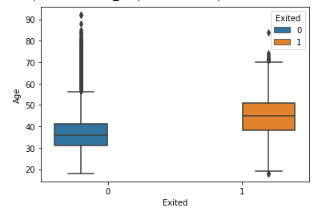

#Kesimpulan

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[::, -1]
y_pred = rf.predict(X_test)
X_result = X_test.copy()
X_result['ProbaExited'] = y_pred_proba
X_result['PredictedExited'] = y_pred

In [ ]:
X_result[(X_result['PredictedExited'] == 1) & (X_result['ProbaExited'] >= 0.90)]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreByAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProbaExited,PredictedExited
7216,0.658,0.310811,0.8,0.588793,0.666667,1.0,0.0,0.863772,0.278452,0.351220,0.000081,1.0,0.0,0.0,0.0,1.0,0.95,1.0
1068,0.488,0.527027,0.6,0.000000,0.000000,1.0,0.0,0.096834,0.132374,0.189474,0.000000,1.0,0.0,0.0,0.0,1.0,0.90,1.0
3898,0.624,0.554054,0.2,0.416776,0.000000,1.0,0.0,0.040243,0.151390,0.061017,0.001222,0.0,1.0,0.0,0.0,1.0,0.97,1.0
3238,0.650,0.486486,0.6,0.000000,0.000000,1.0,0.0,0.551364,0.181835,0.200000,0.000000,1.0,0.0,0.0,0.0,1.0,0.96,1.0
8706,1.000,0.500000,0.7,0.000000,0.000000,0.0,0.0,0.858838,0.252129,0.229091,0.000000,0.0,0.0,1.0,1.0,0.0,0.92,1.0
4511,0.568,0.364865,0.2,0.000000,1.000000,1.0,0.0,0.505188,0.219637,0.080000,0.000000,1.0,0.0,0.0,1.0,0.0,0.91,1.0
8683,0.694,0.418919,0.7,0.778158,1.000000,0.0,1.0,0.655422,0.222864,0.257143,0.000140,1.0,0.0,0.0,1.0,0.0,0.92,1.0
2614,0.392,0.540541,0.3,0.424309,1.000000,1.0,0.0,0.644413,0.108410,0.093103,0.000078,0.0,1.0,0.0,1.0,0.0,0.98,1.0
1254,0.556,0.378378,0.1,0.186811,1.000000,1.0,0.0,0.156318,0.209247,0.039130,0.000141,1.0,0.0,0.0,1.0,0.0,0.91,1.0
376,0.790,0.364865,1.0,0.467248,0.666667,1.0,1.0,0.611906,0.278323,0.400000,0.000090,0.0,1.0,0.0,0.0,1.0,0.92,1.0


Tabel diatas adalah list data Customer dengan potential churn (**Proba Exited**) diatas 90%.

Data ini dapat digunakan oleh team marketing untuk membuat aktivitas marketing agar customer dengan potential churn tersebut tidak meninggalkan produk perusahaan